# CLASSIFICATION PROJECT - CHURN RISK SCORE

In [1]:
# SO WE ARE GOING TO WORK ON CHURN RISK SCORE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\CHURN RATE\\Data set\\train.csv',parse_dates=['joining_date'])

In [4]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
df.shape

(36992, 25)

In [6]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [7]:
df.isnull().sum()
# needs imputing
# i am not thinking of CCA , i will surely loose good amount of data otherwise

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [8]:
df.info()
#I can see that a lot of columns are having string values so this will require a lot of encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36992 non-null  object        
 4   security_no                   36992 non-null  object        
 5   region_category               31564 non-null  object        
 6   membership_category           36992 non-null  object        
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       36992 non-null  object        
 9   referral_id                   36992 non-null  object        
 10  preferred_offer_types         36704 non-null  object        
 11  medium_of_operation         

In [9]:
df.describe()
# Statistics of the numerical columns

,age,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,2016-07-04 04:57:59.325259520,-41.915576,243.472334,29271.194003,686.882199,3.463397
min,10.000000,2015-01-01 00:00:00,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,2015-10-01 00:00:00,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,2016-07-05 00:00:00,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,2017-04-06 00:00:00,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,2017-12-31 00:00:00,26.000000,3235.578521,99914.050000,2069.069761,5.000000
std,15.867412,NaN,228.819900,398.289149,19444.806226,194.063624,1.409661


In [10]:
df['churn_risk_score'].value_counts()
# i can see that the classes are imbalanced specially risk 2 and risk 1 classes
# thus we will have to balance these classes as well for the better working of our classification model

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

# PREPROCESSING

## DROPPING INSIGNIFICANT COLUMNS

In [11]:
#customer_id, Name, security_no,

In [12]:
df.drop(columns=['customer_id','Name','security_no','referral_id','medium_of_operation','internet_option','last_visit_time'],inplace=True)

## DOES 'gender' effect the 'churn_risk_score'

In [13]:
df['gender'].value_counts()
# nice to see that we have almost equal number of males and almost equal number of females in the dataset

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [14]:
df[df['gender']=='F']['churn_risk_score'].value_counts()

churn_risk_score
 3    5159
 4    5123
 5    4926
 2    1351
 1    1333
-1     598
Name: count, dtype: int64

In [15]:
df[df['gender']=='M']['churn_risk_score'].value_counts()

churn_risk_score
 3    5245
 4    5052
 5    4882
 2    1387
 1    1315
-1     562
Name: count, dtype: int64

In [16]:
# similar comoposition , thus risk of churining is not depending on the gender

## ANALYSING THE POSSIBLE EFFECT OF 'region_category' on 'churn_risk_score'

In [17]:
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2


In [18]:
df['region_category'].value_counts()

region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

In [19]:
df[df['region_category']=='Village']['avg_transaction_value'].mean()

30473.511647158975

In [20]:
df[df['region_category']=='City']['avg_transaction_value'].mean()

29113.498926748845

In [21]:
df[df['region_category']=='Village']['avg_transaction_value'].mean()

30473.511647158975

In [22]:
# From this i can see that people of villages are spending more money at an average

In [23]:
df[df['region_category']=='Village']['churn_risk_score'].value_counts()

churn_risk_score
 3    1243
 4    1231
 5    1175
 2     462
 1     438
-1     150
Name: count, dtype: int64

In [24]:
df[df['region_category']=='City']['churn_risk_score'].value_counts()

churn_risk_score
 3    3596
 4    3547
 5    3422
 1     890
 2     860
-1     422
Name: count, dtype: int64

In [25]:
df[df['region_category']=='Town']['churn_risk_score'].value_counts()

churn_risk_score
 3    4078
 4    3899
 5    3759
 2    1017
 1     949
-1     426
Name: count, dtype: int64

In [26]:
# fromt this i can conclude that the column 'region categoory' has no impact on the churn rate , since each churn rate index has the same
# ratio of people in village town and city
# thus i am sure that this will be ordinally encoded

## ANALYSING THE POSSIBLE EFFECT OF 'membership_category' on 'churn_risk_score'

In [27]:
df['membership_category'].value_counts()

membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64

In [28]:
df[df['membership_category']=='Platinum Membership']['churn_risk_score'].value_counts()
# we can see that platinum members are less likely to churn

churn_risk_score
 3    2628
 1     899
 2     675
-1     136
Name: count, dtype: int64

In [29]:
df[df['membership_category']=='Premium Membership']['churn_risk_score'].value_counts()

churn_risk_score
 3    2678
 1     916
 2     714
-1     147
Name: count, dtype: int64

In [30]:
df[df['membership_category']=='Basic Membership']['churn_risk_score'].value_counts()

churn_risk_score
 5    4893
 4    2580
-1     251
Name: count, dtype: int64

In [31]:
df[df['membership_category']=='No Membership']['churn_risk_score'].value_counts()

churn_risk_score
 5    4934
 4    2532
-1     226
Name: count, dtype: int64

In [32]:
df[df['membership_category']=='Silver Membership']['churn_risk_score'].value_counts()

churn_risk_score
 4    2560
 3    2528
 2     718
-1     182
Name: count, dtype: int64

In [33]:
df[df['membership_category']=='Gold Membership']['churn_risk_score'].value_counts()

churn_risk_score
 3    2590
 4    2513
 1     837
 2     634
-1     221
Name: count, dtype: int64

### THUS IT IS CLEAR FROM HERE THAT PEOPLE WITH GOOD MEMBERSHIP ARE LESSER LIKELY TO LEAVE

In [34]:
# Thus we will ordinally encode this particular column

In [35]:
df.head(2)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1


## REFERRALS

In [36]:
df['joined_through_referral'].value_counts()
# so from this we can clearly see that nearly 50 percent of the people joined through referrals and 50 percent didnt join through referrals

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [37]:
df[df['joined_through_referral']=='No']['churn_risk_score'].value_counts()

churn_risk_score
 3    4369
 4    4201
 5    4062
 1    1370
 2    1352
-1     485
Name: count, dtype: int64

In [38]:
df[df['joined_through_referral']=='Yes']['churn_risk_score'].value_counts()

churn_risk_score
 3    4508
 4    4458
 5    4305
 2     992
 1     920
-1     532
Name: count, dtype: int64

In [39]:
# somewhat similar number of peole who joined directly and through referrals are likely to leave
# so it doesnt really effect the churn risk , thus we will one hot encode this after imputing

## Preferred OFFER types

In [40]:
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2


In [41]:
df['preferred_offer_types'].value_counts()
# well this looks nice , since each category has almost equal number of people
# let us figure out if this thing impacts the churn risk or not

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [42]:
df[df['preferred_offer_types']=='Gift Vouchers/Coupons']['churn_risk_score'].value_counts()

churn_risk_score
 3    3366
 4    3217
 5    3152
 1    1141
 2    1101
-1     372
Name: count, dtype: int64

In [43]:
print(((3366+3217+3152)/(12394)))

0.7854607067936098


In [44]:
df[df['preferred_offer_types']=='Credit/Debit Card Offers']['churn_risk_score'].value_counts()

churn_risk_score
 3    3389
 4    3338
 5    3270
 2     997
 1     866
-1     414
Name: count, dtype: int64

In [45]:
print(((3389+3338+3270)/(12274)))

0.8144859051653902


In [46]:
df[df['preferred_offer_types']=='Without Offers']['churn_risk_score'].value_counts()
# let us calculate the percentage of people with a churn risk score of >=3

churn_risk_score
 3    3584
 4    3543
 5    3335
 1     633
 2     621
-1     365
Name: count, dtype: int64

In [47]:
print(((3584+3543+3335)/(3584+3543+3335+633+621+365)))

0.8659879149077063


#### I can see that in people wihtout offers have slightly higher percentage of people with churn risk score >=3

## DAYS SINCE LAST LOG IN

In [48]:
df.head(2)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1


In [49]:
df[df['days_since_last_login']==26]['churn_risk_score'].value_counts()

churn_risk_score
 3    34
 5    21
 4    18
-1     4
 2     4
 1     1
Name: count, dtype: int64

In [50]:
print(((34+21+18)/(34+21+18+9))*100)
# about 90 percent people with 'days_since_last_login'==26 have a churing risk of >=3

89.02439024390245


In [51]:
df[df['days_since_last_login']==15]['churn_risk_score'].value_counts()

churn_risk_score
 3    649
 4    618
 5    612
 2    166
 1    163
-1     70
Name: count, dtype: int64

In [52]:
print(((649+618+612)/(649+618+612+166+163+70))*100)
# about 83 percent people with 'days_since_last_login'==15 have a churing risk of >=3

82.4846356453029


In [53]:
df[(df['days_since_last_login']<=5) & (df['days_since_last_login'])>=1 ]['churn_risk_score'].value_counts()

churn_risk_score
 3    1226
 4    1216
 5    1148
 2     390
 1     307
-1     126
Name: count, dtype: int64

In [54]:
print(((1664+1618+1567)/(1664+1618+1567+539+456+180))*100)

80.49468791500664


In [55]:
df[df['days_since_last_login']>=15]['churn_risk_score'].value_counts()

churn_risk_score
 3    3867
 4    3758
 5    3593
 1     892
 2     876
-1     436
Name: count, dtype: int64

In [56]:
print(((3867+3758+3593)/(3867+3758+3593+892+876+436))*100)

83.5791983310982


In [57]:
df[df['days_since_last_login']<15]['churn_risk_score'].value_counts()

churn_risk_score
 3    6557
 4    6427
 5    6234
 2    1865
 1    1760
-1     727
Name: count, dtype: int64

In [58]:
print(((6557+6427+6234)/(6557+6427+6234+1865+1760))*100)

84.130805936173


#### I am unable to draw any trend over here

## used_special_discount

In [59]:
df['used_special_discount'].value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

In [60]:
df[df['used_special_discount']=='Yes']['churn_risk_score'].value_counts()
# nearly 84 percent of the pople have a churn risk score of >=3

churn_risk_score
 3    5789
 4    5549
 5    5358
 2    1543
 1    1479
-1     624
Name: count, dtype: int64

In [61]:
df[df['used_special_discount']=='No']['churn_risk_score'].value_counts()
#in this case nearly 82 percent people has a churn risk score of >=3
# thus not much differnce by 'special discount' thus i feel like i should drop this column

churn_risk_score
 4    4636
 3    4635
 5    4469
 2    1198
 1    1173
-1     539
Name: count, dtype: int64

In [62]:
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2


In [63]:
df.drop(columns=['used_special_discount'],inplace=True)

## offer_application_preference

In [64]:
df['offer_application_preference'].value_counts()

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64

In [65]:
df[df['offer_application_preference']=='Yes']['churn_risk_score'].value_counts()

churn_risk_score
 3    5592
 4    5542
 5    5344
 2    1668
 1    1637
-1     657
Name: count, dtype: int64

In [66]:
df[df['offer_application_preference']=='No']['churn_risk_score'].value_counts()

churn_risk_score
 3    4832
 4    4643
 5    4483
 2    1073
 1    1015
-1     506
Name: count, dtype: int64

#### Nothing significant here as well

In [67]:
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,Yes,No,Not Applicable,Products always in Stock,2


In [68]:
df.drop(columns=['offer_application_preference'],inplace=True)

## PAST COMPLAINT

In [69]:
df['past_complaint'].value_counts()

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

In [70]:
df[df['past_complaint']=='Yes']['churn_risk_score'].value_counts()

churn_risk_score
 3    5208
 4    5109
 5    4922
 2    1311
 1    1272
-1     568
Name: count, dtype: int64

In [71]:
df[df['past_complaint']=='No']['churn_risk_score'].value_counts()

churn_risk_score
 3    5216
 4    5076
 5    4905
 2    1430
 1    1380
-1     595
Name: count, dtype: int64

<Axes: xlabel='churn_risk_score', ylabel='count'>

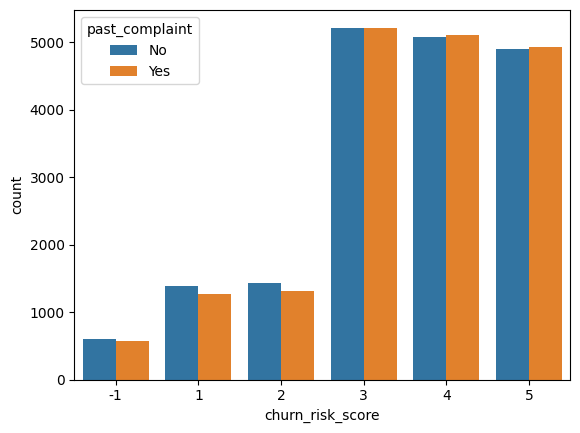

In [72]:
sns.countplot(x=df['churn_risk_score'],hue=df['past_complaint'])

#### past_complaint doesnt effect the churn_risk_score

## COMPLAINT STATUS

In [73]:
df['complaint_status'].value_counts()

complaint_status
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: count, dtype: int64

In [74]:
df[df['complaint_status']=='Not Applicable']['churn_risk_score'].value_counts()

churn_risk_score
 3    5216
 4    5076
 5    4905
 2    1430
 1    1380
-1     595
Name: count, dtype: int64

In [75]:
df[df['complaint_status']=='Solved']['churn_risk_score'].value_counts()

churn_risk_score
 3    1285
 4    1264
 5    1263
 2     338
 1     317
-1     152
Name: count, dtype: int64

In [76]:
df[df['complaint_status']=='Unsolved']['churn_risk_score'].value_counts()

churn_risk_score
 3    1329
 4    1249
 5    1242
 1     341
 2     340
-1     143
Name: count, dtype: int64

In [77]:
df[df['complaint_status']=='No Information Available']['churn_risk_score'].value_counts()

churn_risk_score
 4    1293
 3    1273
 5    1206
 1     323
 2     316
-1     139
Name: count, dtype: int64

#### wth nothing here as well - I am dropping this as well

In [78]:
df.drop(columns=['complaint_status'],inplace=True)

In [79]:
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,past_complaint,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,No,Products always in Stock,2


## FEEDBACK

In [80]:
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,past_complaint,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,17.0,781.75,No,Products always in Stock,2


In [81]:
df['feedback'].value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [82]:
df[df['feedback']=='Reasonable Price']['churn_risk_score'].value_counts()

churn_risk_score
 1    697
 2    685
-1     35
Name: count, dtype: int64

<Axes: xlabel='feedback', ylabel='count'>

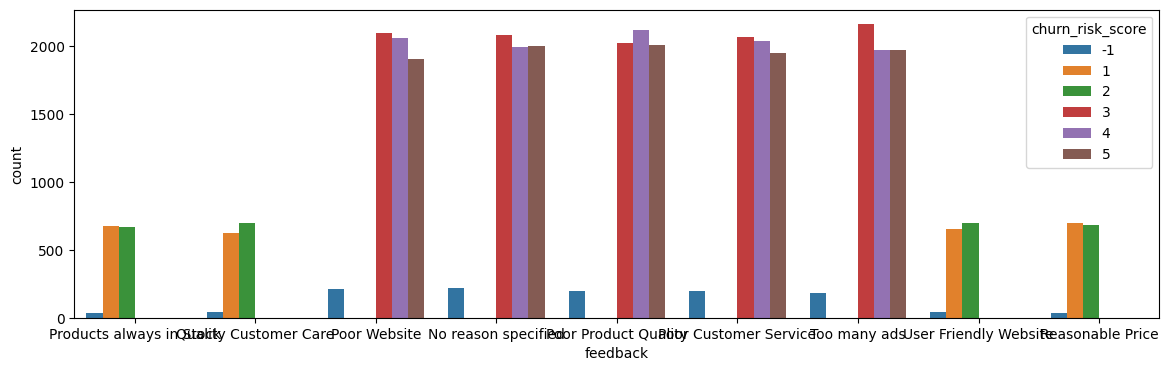

In [83]:
plt.figure(figsize=(14,4))
sns.countplot(x=df['feedback'],hue=df['churn_risk_score'])

In [84]:
# people with -ve feed back are having a high churn risk score

#### WE ARE GOGING TO DIVIDE THE ENTRIES IN THE FEED BACK COLUMN INTO 2 CATEGORIES , 'BAD', 'GOOD'

In [85]:
df['feedback'].replace({'Poor Product Quality':0,'No reason specified':0,'Too many ads':0,'Poor Website':0,'Poor Customer Service':0,
                        'Reasonable Price':1,'User Friendly Website':1,'Products always in Stock':1,'Quality Customer Care':1},inplace=True)

# HANDLING COLUMNS WITH GHOST CATEGORIES

#### GENDER

In [86]:
df['gender'].value_counts()
# my plan is to distribute these 59 values among both the categories

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [87]:
# Calculate the number of 'Unknown' values
num_unknowns = df['gender'].value_counts().get('Unknown', 0)

# Calculate the number of 'Unknown' values to replace with 'M'
num_replace = int(0.5 * num_unknowns)

# Randomly select 'Unknown' indices to replace with 'M'
unknown_indices = df[df['gender'] == 'Unknown'].index
replace_indices = np.random.choice(unknown_indices, num_replace, replace=False)

# Replace 'Unknown' with 'M' at the selected indices
df.loc[replace_indices, 'gender'] = 'M'

In [88]:
df['gender'].value_counts()

gender
F          18490
M          18472
Unknown       30
Name: count, dtype: int64

In [89]:
df['gender'].replace({'Unknown':'F'},inplace=True)

In [90]:
df['gender'].value_counts()

gender
F    18520
M    18472
Name: count, dtype: int64

#### joined_through_referral

In [91]:
df['joined_through_referral'].value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [92]:
# Calculate the number of 'Unknown' values
num_unknowns = df['joined_through_referral'].value_counts().get('?', 0)

# Calculate the number of 'Unknown' values to replace with 'M'
num_replace = int(0.5 * num_unknowns)

# Randomly select 'Unknown' indices to replace with 'M'
unknown_indices = df[df['joined_through_referral'] == '?'].index
replace_indices = np.random.choice(unknown_indices, num_replace, replace=False)

# Replace 'Unknown' with 'M' at the selected indices
df.loc[replace_indices, 'joined_through_referral'] = 'Yes'

In [93]:
df['joined_through_referral'].replace({'?':'No'},inplace=True)

In [94]:
df['joined_through_referral'].value_counts()
# problem solved again hehe

joined_through_referral
No     18558
Yes    18434
Name: count, dtype: int64

#### churn_risk_score

In [95]:
df['churn_risk_score'].replace({-1:1},inplace=True)

In [96]:
df['churn_risk_score'].value_counts()

churn_risk_score
3    10424
4    10185
5     9827
1     3815
2     2741
Name: count, dtype: int64

In [97]:
# this is an imbalanced data set , we will balance it using SMOTE

#### days_since_last_login

In [98]:
df['days_since_last_login'].value_counts()

days_since_last_login
 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: count, dtype: int64

#### avg_frequency_login_days

In [99]:
df['avg_frequency_login_days'].value_counts()

avg_frequency_login_days
Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: count, Length: 1654, dtype: int64

In [100]:
df.drop(columns=['avg_frequency_login_days'],inplace=True)

## NOW WE HAVE EXPLORED MOST OF THE COLUMNS AND NOW WE SHOULD START IMPUTING AND ENCODING

In [101]:
df.shape

(36992, 14)

In [102]:
df.isnull().sum()

age                           0
gender                        0
region_category            5428
membership_category           0
joining_date                  0
joined_through_referral       0
preferred_offer_types       288
days_since_last_login         0
avg_time_spent                0
avg_transaction_value         0
points_in_wallet           3443
past_complaint                0
feedback                      0
churn_risk_score              0
dtype: int64

# IMPUTING

### preferred_offer_types

In [103]:
df['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [104]:
df.dropna(subset=['preferred_offer_types'],inplace=True)

In [105]:
df.shape

(36704, 14)

### points_in_wallet

In [106]:
df['points_in_wallet'].describe()

count    33288.000000
mean       686.919871
std        193.947572
min       -760.661236
25%        616.075000
50%        697.665000
75%        763.955000
max       2069.069761
Name: points_in_wallet, dtype: float64

In [107]:
df['points_in_wallet'].fillna(686.9198,inplace=True)

In [108]:
df.isnull().sum()

age                           0
gender                        0
region_category            5379
membership_category           0
joining_date                  0
joined_through_referral       0
preferred_offer_types         0
days_since_last_login         0
avg_time_spent                0
avg_transaction_value         0
points_in_wallet              0
past_complaint                0
feedback                      0
churn_risk_score              0
dtype: int64

#### region_category

In [109]:
df['region_category'].value_counts()

region_category
Town       14025
City       12635
Village     4665
Name: count, dtype: int64

In [110]:
# we have NaN entries in this column
# since the number of missing entries is more than 10 percent of the data set
# so we will simple impute it with the keyword 'missing'


In [111]:
df['region_category'].fillna('missing',inplace=True)

In [112]:
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,past_complaint,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,17,300.63,53005.25,781.75,No,1,2


#### joining_date

In [113]:
# we will extract the joining year from this data set
df['joining_year']=df['joining_date'].dt.year

In [114]:
df.drop(columns=['joining_date'],inplace=True)

#### days_since_last_login

In [115]:
df['days_since_last_login'].replace({-999:None},inplace=True)

In [116]:
df['days_since_last_login'].fillna(np.mean(df['days_since_last_login']),inplace=True)

In [117]:
df.isnull().sum()

age                        0
gender                     0
region_category            0
membership_category        0
joined_through_referral    0
preferred_offer_types      0
days_since_last_login      0
avg_time_spent             0
avg_transaction_value      0
points_in_wallet           0
past_complaint             0
feedback                   0
churn_risk_score           0
joining_year               0
dtype: int64

#### avg_time_spent

In [118]:
df['avg_time_spent'].describe()

count    36704.000000
mean       243.394279
std        398.020264
min      -2814.109110
25%         60.060000
50%        161.765000
75%        356.222500
max       3235.578521
Name: avg_time_spent, dtype: float64

In [119]:
df['avg_time_spent']=abs(df['avg_time_spent'])

In [120]:
df['avg_time_spent'].describe()

count    36704.000000
mean       314.661463
std        344.453169
min          1.837399
25%         75.417500
50%        186.150000
75%        415.967500
max       3235.578521
Name: avg_time_spent, dtype: float64

In [121]:
df.head(1)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,past_complaint,feedback,churn_risk_score,joining_year
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,17.0,300.63,53005.25,781.75,No,1,2,2017


#### points_in_wallet

In [122]:
df['points_in_wallet']=abs(df['points_in_wallet'])

In [123]:
df['points_in_wallet'].describe()

count    36704.000000
mean       688.151893
std        180.057058
min          0.788907
25%        624.347500
50%        686.919800
75%        757.015000
max       2069.069761
Name: points_in_wallet, dtype: float64

# ENCODING

In [124]:
# this is the final data set which we have now

In [125]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,past_complaint,feedback,churn_risk_score,joining_year
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,17.0,300.63,53005.25,781.7500,No,1,2,2017
1,32,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,16.0,306.34,12838.38,686.9198,Yes,1,1,2017
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,14.0,516.16,21027.00,500.6900,Yes,0,5,2016
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,11.0,53.27,25239.56,567.6600,Yes,0,5,2016
4,31,F,City,No Membership,No,Credit/Debit Card Offers,20.0,113.13,24483.66,663.0600,Yes,0,5,2017


In [126]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [127]:
trans=ColumnTransformer(transformers=[('Hot',OneHotEncoder(drop='first'),[1,2,4,10]),
                                     ('Ordinal',OrdinalEncoder(categories=[['No Membership','Basic Membership','Silver Membership','Gold Membership','Platinum Membership','Premium Membership'],['Gift Vouchers/Coupons','Credit/Debit Card Offers','Without Offers']]),[3,5])],remainder='passthrough')

In [128]:
#categories=[['No Membership','Basic Membership','Silver Membership','Gold Membership','Platinum Membership','Premium Membership'],['Gift Vouchers/Coupons','Credit/Debit Card Offers','Without Offers']]

In [129]:
dfo=trans.fit_transform(df)

In [130]:
df_=pd.DataFrame(dfo)

In [131]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,17.0,300.63,53005.25,781.7500,1.0,2.0,2017.0
1,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,32.0,16.0,306.34,12838.38,686.9198,1.0,1.0,2017.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,44.0,14.0,516.16,21027.00,500.6900,0.0,5.0,2016.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,37.0,11.0,53.27,25239.56,567.6600,0.0,5.0,2016.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,31.0,20.0,113.13,24483.66,663.0600,0.0,5.0,2017.0


In [132]:
print(df.shape,df_.shape)

(36704, 14) (36704, 16)


In [133]:
df_[14].value_counts()

14
3.0    10339
4.0    10098
5.0     9757
1.0     3791
2.0     2719
Name: count, dtype: int64

In [134]:
# Currently we have [1,2,3,4,5] entries in the dependent column , i want to change it to [0,1,2,3,4] for XGboost 

In [135]:
df_[14].replace({1:0,2:1,3:2,4:3,5:4},inplace=True)

In [136]:
df_[14].value_counts()

14
2.0    10339
3.0    10098
4.0     9757
0.0     3791
1.0     2719
Name: count, dtype: int64

## BALANCING THE IMBALANCED DATA SET

In [137]:
df_[14].value_counts()

14
2.0    10339
3.0    10098
4.0     9757
0.0     3791
1.0     2719
Name: count, dtype: int64

# ***SMOTE***

In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
X=df_.drop(columns=[14])
Y=df_.iloc[:,14:15]

In [140]:
sm=SMOTE()
X_,Y_re=sm.fit_resample(X,Y)

In [141]:
Y.value_counts()

14 
2.0    10339
3.0    10098
4.0     9757
0.0     3791
1.0     2719
Name: count, dtype: int64

In [142]:
Y_re.value_counts()

14 
0.0    10339
1.0    10339
2.0    10339
3.0    10339
4.0    10339
Name: count, dtype: int64

In [143]:
X_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,17.0,300.63,53005.25,781.7500,1.0,2017.0
1,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,32.0,16.0,306.34,12838.38,686.9198,1.0,2017.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,44.0,14.0,516.16,21027.00,500.6900,0.0,2016.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,37.0,11.0,53.27,25239.56,567.6600,0.0,2016.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,31.0,20.0,113.13,24483.66,663.0600,0.0,2017.0


#### STANDARD SCALING THE SMOTE DATA

In [144]:
# I have already test standard scaling and min_max scaling , my models are performing better with standard scaled data 
from sklearn.preprocessing import StandardScaler

In [145]:
sc=StandardScaler()
X_r=sc.fit_transform(X_)

In [146]:
X_re=pd.DataFrame(X_r,columns=X_.columns)

In [147]:
# SO FINALLY WE HAVE 'X_re' and 'Y_re'

# ADASYN

In [148]:
from imblearn.over_sampling import ADASYN
# it stands for Adaptive synthetic sampling technique
# SMOTE - synthetic minority over sampling technique

In [149]:
ad=ADASYN(sampling_strategy='minority')
X_ad,Y_ad=ad.fit_resample(X,Y)

In [150]:
ad=ADASYN(sampling_strategy='minority')
X_ad,Y_ad=ad.fit_resample(X_ad,Y_ad)

#### HERE I APPLIED ADASAYN TWICE BECAUSE WE NEEDED TO UPSAMPLE TWO CATEGORIES AND 

In [151]:
Y_ad.value_counts()

14 
0.0    10500
2.0    10339
1.0    10303
3.0    10098
4.0     9757
Name: count, dtype: int64

#### STANDARD SCALING THE ADASYN DATA

In [152]:
sc=StandardScaler()
X_a=sc.fit_transform(X_ad)
X_ad=pd.DataFrame(X_a,columns=X_ad.columns)

In [153]:
# SO FINALLY WE HAVE 'X_ad' and 'Y_ad'

#### SMOTE AND ADASYN ARE IMPROVING THE MODELS PERFORMANCE BY 5% 

In [154]:
# we have X_re, Y_re  SMOTE upsampled
# we have X_ad, Y_ad   ADASYN upsampled
# we have X ,Y our pure data without oversampling and scaling

# > RandomForestClassifier >

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

>IMBALANCED ,UNSCALED 

In [935]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
rr=RandomForestClassifier()
rr.fit(X_train,Y_train)
Y_pred=rr.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7609317531671435


> SMOTE STANDARD SCALED

In [157]:
X_train,X_test,Y_train,Y_test=train_test_split(X_re,Y_re,test_size=0.2)

In [158]:
rr=RandomForestClassifier()
rr.fit(X_train,Y_train)
Y_pred=rr.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7974659057935971


> ADASYN STANDARD SCALED

In [162]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ad,Y_ad,test_size=0.2)
rr=RandomForestClassifier()
rr.fit(X_train,Y_train)
Y_pred=rr.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.798882133751716


> TUNING RANDOM FOREST WITH ADASYN STANDARD SCALED DATA SET

In [164]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ad,Y_ad,test_size=0.2)
rf=RandomForestClassifier(bootstrap=True,criterion='gini',max_features=0.5,max_samples=1.0,max_depth=None,min_samples_split=3,n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8029411764705883


#### Overall RandomForestClassifier() is working slightly better with synthetic data generated using ADASYN

In [938]:
# SO OUR DATA IS 
# X,Y unsampled 
# X_re,Y_re oversampled using SMOTE
# X_ad,Y_ad over_sampled using ADASYN

# LOGISTIC REGRESSION

> NON-Over sampled

In [166]:
from sklearn.linear_model import LogisticRegression

In [172]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [197]:
lr=LogisticRegression(max_iter=1000,multi_class='ovr',solver='liblinear',random_state=42)
#max_iter for the gradient descet
#also we can pass learning rate to fine tune it
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6455187291625809


>OVER SAMPLED USING SMOTE

In [201]:
X_train,X_test,Y_train,Y_test=train_test_split(X_re,Y_re,test_size=0.2,random_state=42)
lr=LogisticRegression(max_iter=1000,multi_class='ovr',solver='liblinear')
#max_iter for the gradient descet
#also we can pass learning rate to fine tune it
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.638843215011123


>OVER SAMPLED USING ADASYN

In [169]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ad,Y_ad,test_size=0.2,random_state=42)
lrf=LogisticRegression(max_iter=1000,multi_class='ovr',solver='liblinear',C=10000)
#max_iter for the gradient descet
#also we can pass learning rate to fine tune it
lrf.fit(X_train,Y_train)
Y_pred=lrf.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6504901960784314


In [200]:
np.mean(cross_val_score(lr,X_ad,Y_ad,cv=5,scoring='accuracy'))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

0.647715238282016

## DISADVANTAGE OF SMOTE AND ADASYN OVERSAMPLLING TECHNIQUES

In [945]:
# i wanna see ehat changes ADASYN and SMOTE made to my data set 
# SMOTE - synthetic minority oversasmpling technique
# ADASYN- adaptive synthetic sampling technique

In [946]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,17.0,300.63,53005.25,781.7500,1.0,2017.0
1,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,32.0,16.0,306.34,12838.38,686.9198,1.0,2017.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,44.0,14.0,516.16,21027.00,500.6900,0.0,2016.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,37.0,11.0,53.27,25239.56,567.6600,0.0,2016.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,31.0,20.0,113.13,24483.66,663.0600,0.0,2017.0


In [947]:
X[1].value_counts()
# here i can see that the column number 1 has only two categories ,this is pre balancing

1
0.0    22679
1.0    14025
Name: count, dtype: int64

In [948]:
X_re[1].unique().shape
# now we can see that the column number 1 has 6863 categories post SMOTE

(6941,)

In [949]:
X_ad[1].unique().shape
# also here we can see that post ADASYN as well we have 6661 categoies ,
# THUS WE KNOW THAT THESE SYNTHETIC OVERSAMPLING TECHNIQUES TEND TO DESTROY THE COMPOSITION OF CATEGORICAL COLUMNS

(6654,)

In [950]:
X_re[1].value_counts()
# But the fact that one should note down is that the frequency of newly generated categories is very less 
# and the composition of original categories is almost the same 

1
-0.818168    28707
 1.350786    16049
 1.187047        1
-0.102922        1
 0.552292        1
             ...  
-0.756946        1
 0.788847        1
 1.063053        1
 1.110320        1
 0.440027        1
Name: count, Length: 6941, dtype: int64

In [951]:
X_re

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15
0,-1.050139,-0.818168,2.670443,-0.436223,-1.010391,-1.039063,0.916346,-1.228405,-1.262987,0.845064,-0.045953,0.787990,0.462123,1.389060,1.282513
1,-1.050139,-0.818168,-0.421489,-0.436223,-1.010391,1.066746,1.527584,-1.228405,-0.335918,0.651381,-0.028924,-0.907143,-0.099205,1.389060,1.282513
2,-1.050139,1.350786,-0.421489,-0.436223,1.087824,1.066746,-1.528605,-1.228405,0.458713,0.264017,0.596823,-0.561565,-1.201554,-0.738212,-0.002676
3,1.054837,-0.818168,-0.421489,-0.436223,1.087824,1.066746,-1.528605,-1.228405,-0.004821,-0.317031,-0.783655,-0.383785,-0.805139,-0.738212,-0.002676
4,-1.050139,-0.818168,-0.421489,-0.436223,-1.010391,1.066746,-1.528605,0.063807,-0.402137,1.426111,-0.605134,-0.415686,-0.240438,-0.738212,1.282513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51690,-0.043882,-0.818168,1.056570,-0.436223,-1.010391,0.060091,-1.209562,-1.228405,0.464190,0.963174,-0.062981,-0.787555,-0.559790,-0.738212,1.282513
51691,-1.050139,-0.818168,-0.421489,-0.436223,1.087824,1.066746,-1.277585,-0.466873,0.467009,1.778874,0.702835,-0.594874,-0.250321,-0.738212,-0.002676
51692,0.895928,1.187047,-0.421489,-0.436223,1.087824,0.907774,-1.528605,0.161359,0.185070,-0.543559,2.057885,-1.356478,-0.663573,-0.738212,-0.099698
51693,0.148056,1.350786,-0.421489,-0.436223,-1.010391,0.159606,-1.180676,0.799359,-0.700612,-0.814643,-0.808391,-0.282615,-1.144157,-0.738212,-0.734232


In [952]:
X_ad

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15
0,-1.045196,-0.817582,2.647678,-0.435025,-1.006631,-1.033068,0.905723,-1.226126,-1.259826,0.844824,-0.050022,0.880012,0.455394,1.381010,1.272786
1,-1.045196,-0.817582,-0.421786,-0.435025,-1.006631,1.068698,1.519242,-1.226126,-0.333440,0.651682,-0.033102,-0.885879,-0.105198,1.381010,1.272786
2,-1.045196,1.348251,-0.421786,-0.435025,1.088449,1.068698,-1.548353,-1.226126,0.460604,0.265397,0.588639,-0.525876,-1.206102,-0.745153,-0.010247
3,1.054780,-0.817582,-0.421786,-0.435025,1.088449,1.068698,-1.548353,-1.226126,-0.002589,-0.314029,-0.783001,-0.340675,-0.810206,-0.745153,-0.010247
4,-1.045196,-0.817582,-0.421786,-0.435025,-1.006631,1.068698,-1.548353,0.064400,-0.399611,1.424250,-0.605624,-0.373907,-0.246246,-0.745153,1.272786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50983,-1.045196,-0.817582,-0.421786,2.342129,0.952260,0.932074,0.945604,0.064400,-1.494398,-0.406730,0.177701,2.909627,2.214852,1.381010,1.105980
50984,1.019927,1.312305,-0.421786,-0.435025,1.088449,1.068698,-0.914470,1.333507,-1.322702,-0.687491,-0.580204,0.463584,-0.294523,-0.745153,0.011047
50985,1.054780,1.348251,-0.421786,-0.435025,0.886705,1.068698,-0.816678,1.354926,-1.306881,-0.774707,-0.549300,0.463924,-0.306443,-0.745153,-0.133795
50986,-0.821598,1.348251,-0.421786,-0.435025,-1.006631,-1.033068,1.388591,-0.951305,-0.790822,0.816202,-0.333711,1.342375,0.448668,1.381010,1.136173


# XGBoost

In [157]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

>IMBALANCED

In [227]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
xg=XGBClassifier()
xg.fit(X_train,Y_train)
Y_pred=xg.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.7553466830132135


> SMOTE + STANDARD SCALED

In [228]:
X_train,X_test,Y_train,Y_test=train_test_split(X_re,Y_re,test_size=0.2)
xg=XGBClassifier()
xg.fit(X_train,Y_train)
Y_pred=xg.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.7960150884998549


In [959]:
np.mean(cross_val_score(xg,X_re,Y_re,cv=5,scoring='accuracy'))

0.7885482154947288

> ADASYN + STANDARD SCALED

In [231]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ad,Y_ad,test_size=0.2)
xg=XGBClassifier()
xg.fit(X_train,Y_train)
Y_pred=xg.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.7944695038242793


In [232]:
np.mean(cross_val_score(xg,X_ad,Y_ad,cv=5,scoring='accuracy'))

0.7984702882918218

> TUNING XGBoost WITH ADASYN SCALED DATA

In [170]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ad,Y_ad,test_size=0.2)
xgf=XGBClassifier(max_depth=20,subsample=1.0,colsample_bytree=0.90,min_child_weight=1,n_estimators=200,objective='multi:softmax',booster='gbtree')
xgf.fit(X_train,Y_train)
Y_pred=xgf.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.8141176470588235


In [160]:
np.mean(cross_val_score(xg,X_ad,Y_ad,cv=5,scoring='accuracy'))

0.8097943723817599

# KNN

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

>IMBALANCED

In [212]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,Y_train)
print(accuracy_score(Y_test,knn.predict(X_test)))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.4675112382509195


>SMOTE

In [214]:
X_train,X_test,Y_train,Y_test=train_test_split(X_re,Y_re,test_size=0.2,random_state=21)
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,Y_train)
print(accuracy_score(Y_test,knn.predict(X_test)))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6847857626462908


>ADASYN

In [172]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ad,Y_ad,test_size=0.2,random_state=21)
knnf=KNeighborsClassifier(n_neighbors=5,weights='distance')
knnf.fit(X_train,Y_train)
print(accuracy_score(Y_test,knnf.predict(X_test)))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6838235294117647


In [223]:
np.mean(cross_val_score(knn,X_ad,Y_ad,cv=5,scoring='accuracy'))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: Data

0.6902137674053737

# VOTING CLASSIFIER

In [188]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

In [182]:
l=[('random_forest',rf),('XG',xgf),('Logistic_regg',lrf),('KNN',knnf)]

In [ ]:
#('Logistic_regg',lrf)

In [183]:
X_train,X_test,Y_train,Y_test=train_test_split(X_ad,Y_ad,test_size=0.2,random_state=21)

In [187]:
vc=VotingClassifier(estimators=l,voting='soft',n_jobs=-1,weights=[1.5,1.5,0.6,1]) # Hard Voting By Default i.e majority count 
vc.fit(X_train,Y_train)
Y_pred=vc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.8158823529411765


In [190]:
print(f1_score(Y_pred,Y_test,average='weighted'))

0.8173237113605777
